[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Platanias\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


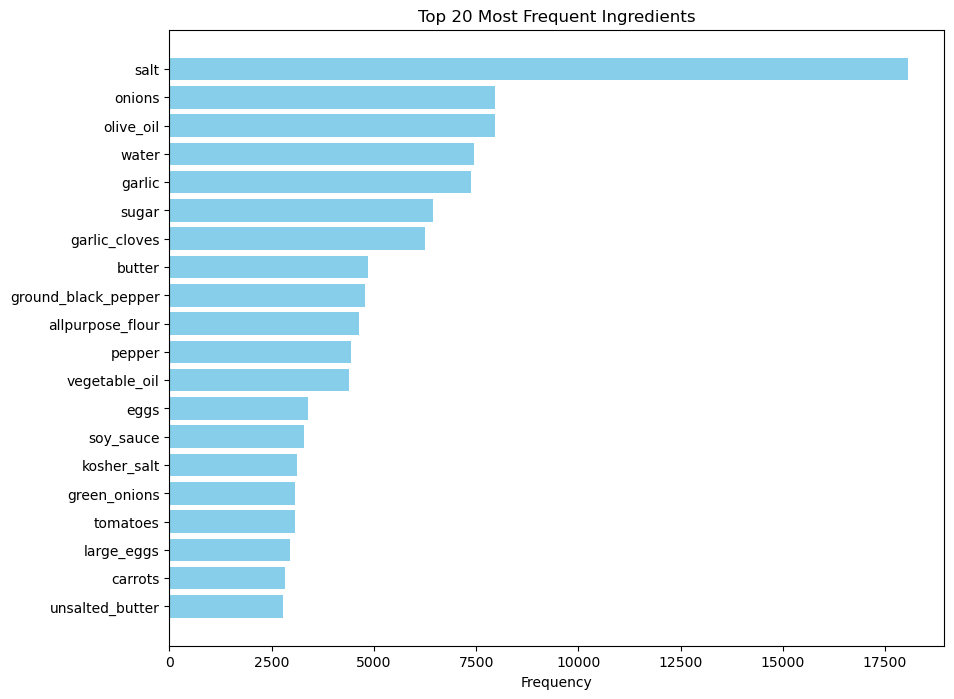

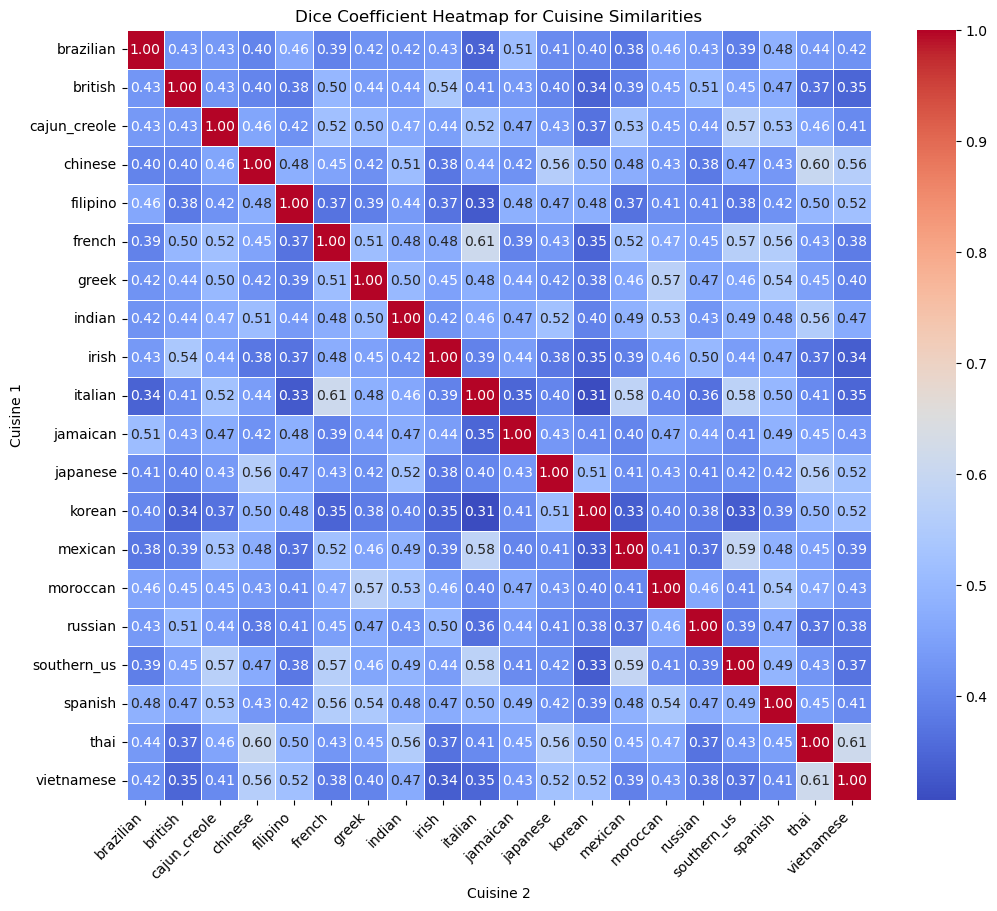

In [2]:
# working with a dataset from the competition What's Cooking were the task is to predict the type of the cuisine
# (for example Italian, Greek etc.) given the ingredients. 39774 recipes
# We have 20 different cuisines. 
# Plot the top 20 most frequent words.
# Group by cuisine and plot the 20 most frequent words.
# Measure the overlap of each pair of cuisines in terms of Dice coefficient.


import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import string
import nltk
import seaborn as sns 

# necessary NLTK stopwords dataset
nltk.download('stopwords')

# JSON dataset into a pandas DataFrame
with open('data/train.json', 'r') as file:
    data = json.load(file)
df = pd.DataFrame(data)

# Define stop words and remove punctuation & numbers
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation + '1234567890')

# Function to clean ingredient names Define stop words and remove punctuation & numbers
def preprocess(ingredients):
    processed = []
    for ingredient in ingredients:
        clean_ingredient = ingredient.translate(translator).lower()

        clean_ingredient = '_'.join([word for word in clean_ingredient.split() if word not in stop_words])
        processed.append(clean_ingredient)
    return processed


df['ingredients_clean'] = df['ingredients'].apply(preprocess)

# Function to plot the most common ingredients

def plot_top_ingredients(data, title='Top 20 Most Frequent Ingredients'):
    all_ingredients = [ingredient for sublist in data for ingredient in sublist]
    counts = Counter(all_ingredients)
    most_common = counts.most_common(20)

    ingredients = [ingredient[0] for ingredient in most_common]
    frequencies = [ingredient[1] for ingredient in most_common]

# Plot the Dice Coefficients between cuisine pairs
    plt.figure(figsize=(10, 8))
    plt.barh(ingredients[::-1], frequencies[::-1], color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.show()

# Apply the preprocessing function to the dataset
plot_top_ingredients(df['ingredients_clean'])
# Function to find the union of ingredient sets for each cuisine
def union_of_sets(series):
    return set.union(*series)

# Apply the preprocessing function to the dataset
df['unique_tokens'] = df['ingredients_clean'].apply(set)
vocab_df = df.groupby('cuisine')['unique_tokens'].agg(union_of_sets).reset_index()
vocab_df.columns = ['Cuisine', 'Unique_Tokens']
from itertools import combinations

import matplotlib.pyplot as plt

# Function to calculate Dice coefficient between two sets
def dice_coefficient(set1, set2):
    if not set1 or not set2:
        return 0.0
    return 2 * len(set1.intersection(set2)) / (len(set1) + len(set2))

# Load the dataset (Ensure df is already available)
df['unique_tokens'] = df['ingredients_clean'].apply(set)

# Group by cuisine to get unique ingredient sets for each cuisine
vocab_df = df.groupby('cuisine')['unique_tokens'].agg(lambda x: set.union(*x)).reset_index()

# Get list of all cuisines
cuisines = vocab_df['cuisine'].tolist()
num_cuisines = len(cuisines)

# Create an empty matrix for Dice Coefficients
dice_matrix = pd.DataFrame(index=cuisines, columns=cuisines, dtype=float)

# Compute Dice Coefficients for all cuisine pairs
for cuisine1, tokens1 in vocab_df.itertuples(index=False):
    for cuisine2, tokens2 in vocab_df.itertuples(index=False):
        dice_matrix.loc[cuisine1, cuisine2] = dice_coefficient(tokens1, tokens2)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(dice_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Dice Coefficient Heatmap for Cuisine Similarities")
plt.xlabel("Cuisine 2")
plt.ylabel("Cuisine 1")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()